<a href="https://colab.research.google.com/github/cantika-alff/VisiKomputer-2025/blob/main/Jobsheet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM

## Praktikum D1 – Regresi dari Citra Sintetis (Prediksi Radius Lingkaran)

### Langkah 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras import layers, models

# Generator 1 sample
def make_sample(img_size=64, min_r=5, max_r=20):
  r = np.random.randint(min_r, max_r + 1) # radius acak
  img = np.zeros((img_size, img_size), dtype=np.uint8)
  cx = np.random.randint(r, img_size - r) # center-x
  cy = np.random.randint(r, img_size - r) # center-y
  cv2.circle(img, (cx, cy), r, (255,), -1) # lingkaran putih terisi
  img = (img / 255.0).astype(np.float32)
  # 3-channel biar kompatibel CNN
  img3 = np.stack([img, img, img], axis=-1)
  return img3, float(r), (cx, cy)

### Langkah 2

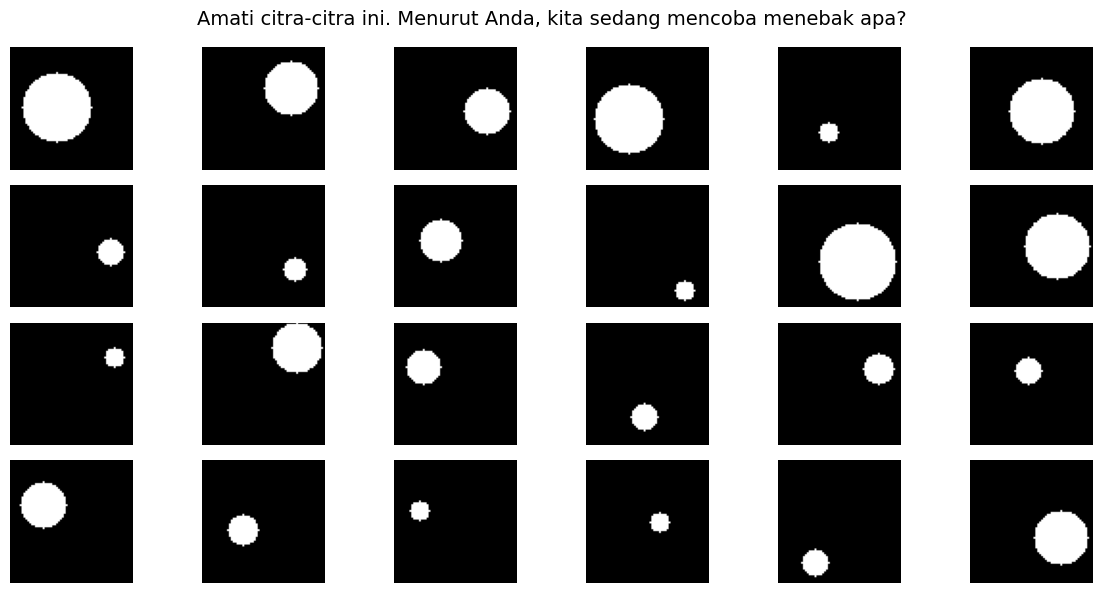

In [ ]:
# Buat 24 contoh untuk visualisasi
N_show = 24
samples = [make_sample() for _ in range(N_show)]
imgs = [s[0] for s in samples]
rads = [s[1] for s in samples]
centers = [s[2] for s in samples]


# --- Tampilkan grid 24 gambar TANPA label ---
cols = 6
rows = N_show // cols
plt.figure(figsize=(12, 6))
for i in range(N_show):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(imgs[i].squeeze(), cmap='gray')
    plt.axis('off')
plt.suptitle("Amati citra-citra ini. Menurut Anda, kita sedang mencoba menebak apa?", fontsize=14)
plt.tight_layout()
plt.show()


### Langkah 3

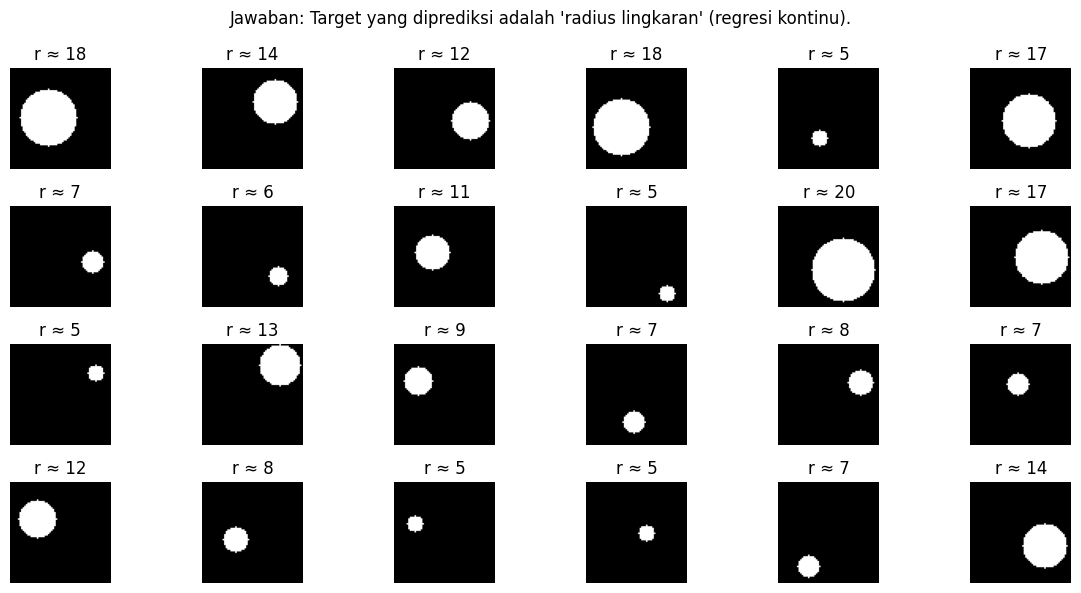

In [ ]:
# Tampilkan kembali, sekarang tampilkan radius (label) di judul tiap subplot
plt.figure(figsize=(12, 6))
for i in range(N_show):
  plt.subplot(rows, cols, i+1)
  plt.imshow(imgs[i].squeeze(), cmap='gray')
  plt.title(f"r ≈ {int(rads[i])}")
  plt.axis('off')
plt.suptitle("Jawaban: Target yang diprediksi adalah 'radius lingkaran' (regresi kontinu).")
plt.tight_layout()
plt.show()


### Langkah 4

In [ ]:
# Siapkan dataset lebih besar untuk training
N = 3000
X, y, C = zip(*[make_sample() for _ in range(N)])
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

# Model CNN sederhana
model = models.Sequential([
    layers.Input((64,64,3)),
    layers.Conv2D(32, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1) # output regresi
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(Xtr, ytr, validation_data=(Xte, yte),
                    epochs=12, batch_size=64, verbose=0)
# Evaluasi
y_pred = model.predict(Xte).ravel()
mae = mean_absolute_error(yte, y_pred)
rmse = float(np.sqrt(np.mean((yte - y_pred)**2)))
r2 = r2_score(yte, y_pred)
print(f"MAE={mae:.3f} | RMSE={rmse:.3f} | R²={r2:.3f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
MAE=1.034 | RMSE=1.248 | R²=0.924


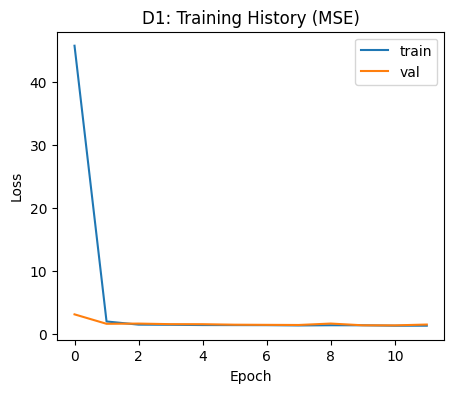

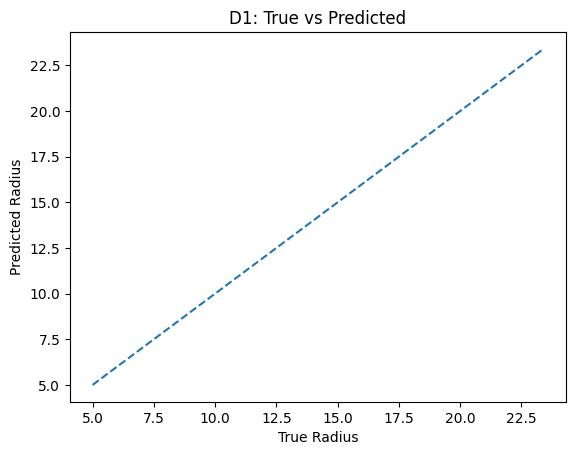

In [ ]:
# Plot loss
plt.figure(figsize=(5,4))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("D1: Training History (MSE)")
plt.xlabel("Epoch");
plt.ylabel("Loss");
plt.legend();
plt.show()

# Scatter True vs Pred plt.figure(figsize=(5,5)) plt.scatter(yte, y_pred, s=10, alpha=0.6)
lims = [min(yte.min(), y_pred.min()), max(yte.max(), y_pred.max())]
plt.plot(lims, lims, '--')
plt.xlabel("True Radius");
plt.ylabel("Predicted Radius")
plt.title("D1: True vs Predicted")
plt.show()


### Tantangan Mini

#### Ubah rentang radius (mis. 8–28) dan lihat dampaknya ke MAE/RMSE/R²

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models
import math

# ===== Fungsi generator =====
def make_sample(img_size=64, min_r=8, max_r=28):
    r = np.random.randint(min_r, max_r + 1)
    img = np.zeros((img_size, img_size), dtype=np.uint8)
    cx = np.random.randint(r, img_size - r)
    cy = np.random.randint(r, img_size - r)
    cv2.circle(img, (cx, cy), r, (255,), -1)
    img = (img / 255.0).astype(np.float32)
    img3 = np.stack([img, img, img], axis=-1)
    return img3, float(r)

# ===== Generate dataset =====
N = 3000
X, y = zip(*[make_sample() for _ in range(N)])
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

# ===== Model CNN sederhana =====
model = models.Sequential([
    layers.Input((64,64,3)),
    layers.Conv2D(32, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# ===== Training =====
history = model.fit(Xtr, ytr, validation_data=(Xte, yte),
                    epochs=10, batch_size=64, verbose=0)

# ===== Evaluasi =====
y_pred = model.predict(Xte).ravel()
mae = mean_absolute_error(yte, y_pred)
rmse = math.sqrt(np.mean((yte - y_pred)**2))
r2 = r2_score(yte, y_pred)
print(f"[Eksperimen 1] MAE={mae:.3f} | RMSE={rmse:.3f} | R²={r2:.3f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
[Eksperimen 1] MAE=0.858 | RMSE=1.063 | R²=0.971


#### Tambahkan noise (blur, noise Gaussian) ke citra → bagaimana performanya?




In [ ]:
# ===== Fungsi generator dengan noise =====
def make_sample_noisy(img_size=64, min_r=5, max_r=20):
    r = np.random.randint(min_r, max_r + 1)
    img = np.zeros((img_size, img_size), dtype=np.uint8)
    cx = np.random.randint(r, img_size - r)
    cy = np.random.randint(r, img_size - r)
    cv2.circle(img, (cx, cy), r, (255,), -1)

    # Tambahkan Gaussian blur
    img = cv2.GaussianBlur(img, (5,5), 0)

    # Tambahkan Gaussian noise
    noise = np.random.normal(0, 10, img.shape)
    img = np.clip(img + noise, 0, 255).astype(np.uint8)

    img = (img / 255.0).astype(np.float32)
    img3 = np.stack([img, img, img], axis=-1)
    return img3, float(r)

# ===== Generate dataset =====
N = 3000
X, y = zip(*[make_sample_noisy() for _ in range(N)])
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

# ===== Model CNN =====
model_noisy = models.Sequential([
    layers.Input((64,64,3)),
    layers.Conv2D(32, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model_noisy.compile(optimizer='adam', loss='mse', metrics=['mae'])

# ===== Training =====
history_noisy = model_noisy.fit(Xtr, ytr, validation_data=(Xte, yte),
                                epochs=10, batch_size=64, verbose=0)

# ===== Evaluasi =====
y_pred = model_noisy.predict(Xte).ravel()
mae = mean_absolute_error(yte, y_pred)
rmse = math.sqrt(np.mean((yte - y_pred)**2))
r2 = r2_score(yte, y_pred)
print(f"[Eksperimen 2] MAE={mae:.3f} | RMSE={rmse:.3f} | R²={r2:.3f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
[Eksperimen 2] MAE=0.927 | RMSE=1.154 | R²=0.937


#### 	Jadikan tugas multi-output: prediksikan [r,cx,cy][r, c_x, c_y][r,cx,cy] sekaligus; metrik evaluasi apa yang cocok?

In [ ]:
# ===== Fungsi generator multi-output =====
def make_sample_multi(img_size=64, min_r=5, max_r=20):
    r = np.random.randint(min_r, max_r + 1)
    img = np.zeros((img_size, img_size), dtype=np.uint8)
    cx = np.random.randint(r, img_size - r)
    cy = np.random.randint(r, img_size - r)
    cv2.circle(img, (cx, cy), r, (255,), -1)
    img = (img / 255.0).astype(np.float32)
    img3 = np.stack([img, img, img], axis=-1)
    return img3, np.array([float(r), float(cx), float(cy)], dtype=np.float32)

# ===== Generate dataset =====
N = 3000
X, y = zip(*[make_sample_multi() for _ in range(N)])
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

# ===== Model multi-output =====
model_multi = models.Sequential([
    layers.Input((64,64,3)),
    layers.Conv2D(32, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3)  # output 3 nilai: [r, cx, cy]
])
model_multi.compile(optimizer='adam', loss='mse', metrics=['mae'])

# ===== Training =====
history_multi = model_multi.fit(Xtr, ytr, validation_data=(Xte, yte),
                                epochs=10, batch_size=64, verbose=0)

# ===== Evaluasi =====
y_pred = model_multi.predict(Xte)

mae_per_dim = np.mean(np.abs(yte - y_pred), axis=0)
r2_per_dim = [r2_score(yte[:,i], y_pred[:,i]) for i in range(3)]

print(f"[Eksperimen 3] MAE per dimensi (r, cx, cy): {mae_per_dim}")
print(f"[Eksperimen 3] R² per dimensi (r, cx, cy): {r2_per_dim}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
[Eksperimen 3] MAE per dimensi (r, cx, cy): [1.0260329 5.18364   4.907931 ]
[Eksperimen 3] R² per dimensi (r, cx, cy): [0.9205676317214966, 0.6926140189170837, 0.6621785759925842]


## Praktikum D2 – Menebak Umur Manusia dari Foto Wajah (UTKFace)

### Langkah 1

In [ ]:
Sudah membuat Akun Kaggle dan Mengunduh kaggle.json

### Langkah 2

In [ ]:
# Jalankan ini di awal notebook
from google.colab import files
files.upload() # pilih file kaggle.json dari komputer Anda

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cantikaalifia","key":"0d5c747823d1096fa60d022317651dac"}'}

In [ ]:
import os, shutil
if os.path.exists("kaggle.json"):
  os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
  shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
  os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)
  !pip -q install kaggle
  print("✅ Kaggle API siap digunakan.")
else:
  print(" .ı kaggle.json belum ditemukan. Upload terlebih dahulu.")

✅ Kaggle API siap digunakan.


### Langkah 3

In [ ]:
# Unduh dataset UTKFace (sekali saja)
!kaggle datasets download -d jangedoo/utkface-new -p /content -q
!unzip -q /content/utkface-new.zip -d /content/utk
print("✅ Dataset UTKFace berhasil diekstrak.")

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
✅ Dataset UTKFace berhasil diekstrak.


### Langkah 4

Total gambar ditemukan: 23708


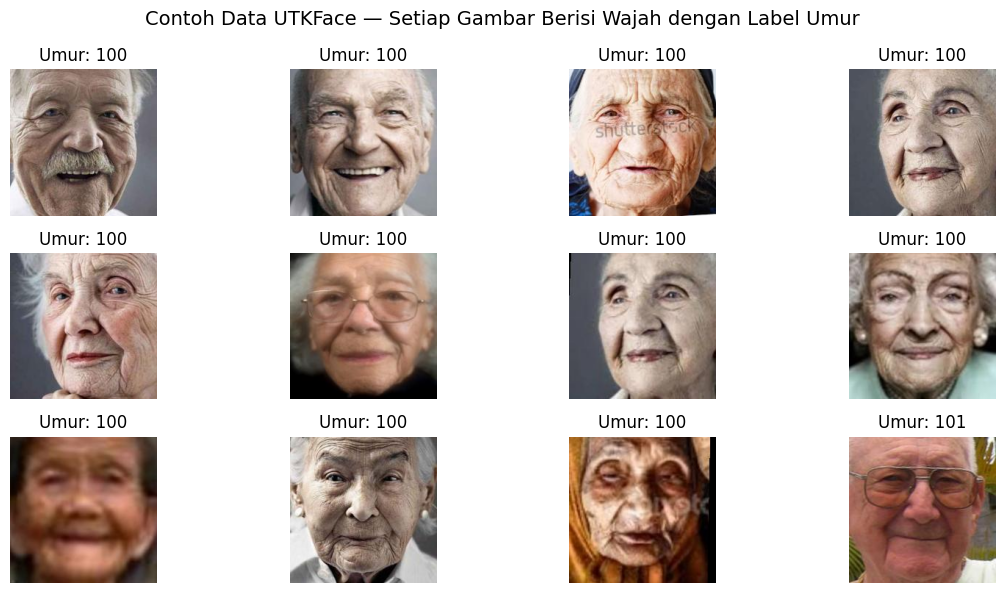

In [ ]:
import matplotlib.pyplot as plt
import os, glob
from PIL import Image

# Ambil 12 gambar acak dari dataset
files = glob.glob("/content/utk/UTKFace/*.jpg")
files = sorted(files)
print(f"Total gambar ditemukan: {len(files)}")

plt.figure(figsize=(12, 6))
for i, f in enumerate(files[:12]):
  # Ambil umur dari nama file
  age = int(os.path.basename(f).split("_")[0])
  img = Image.open(f)
  plt.subplot(3, 4, i + 1)
  plt.imshow(img)
  plt.title(f"Umur: {age}")
  plt.axis("off")
plt.suptitle("Contoh Data UTKFace — Setiap Gambar Berisi Wajah dengan Label Umur", fontsize=14)
plt.tight_layout()
plt.show()

### Langkah 5

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

def parse_age_from_name(fp):
    return int(os.path.basename(fp).split('_')[0])

ages = np.array([parse_age_from_name(f) for f in files], dtype=np.float32)
train_files, test_files, y_train, y_test = train_test_split(
    files, ages, test_size=0.2, random_state=42
)

IMG_SIZE = 160
def load_img(fp, label):
    img = tf.io.read_file(fp)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    return img / 255.0, label

train_ds = tf.data.Dataset.from_tensor_slices((train_files,
                                               y_train)).map(load_img).batch(64)
test_ds = tf.data.Dataset.from_tensor_slices((test_files,
                                              y_test)).map(load_img).batch(64)

print("✅ Dataset siap dilatih.")

✅ Dataset siap dilatih.


### Langkah 6

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Gunakan GPU jika tersedia
print("Hardware:", "GPU" if tf.config.list_physical_devices('GPU') else "CPU")

# Buat arsitektur model
base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    weights='imagenet'
)
base_model.trainable = False # tahap awal: freeze backbone
# Tambahkan head regresi
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs * 255.0)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(1)(x) # output tunggal: umur
model = tf.keras.Model(inputs, outputs)

# Kompilasi model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss='mse', metrics=['mae'])

model.summary()

Hardware: GPU
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multiply (Multiply)             │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

### Langkah 7

Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 64s 152ms/step - loss: 332.9129 - mae: 13.3970 - val_loss: 157.5472 - val_mae: 9.5668 - learning_rate: 0.0010
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - loss: 153.7211 - mae: 9.2513 - val_loss: 144.1733 - val_mae: 8.9768 - learning_rate: 0.0010
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - loss: 145.2756 - mae: 8.9198 - val_loss: 139.3639 - val_mae: 8.7094 - learning_rate: 0.0010
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - loss: 142.1179 - mae: 8.7643 - val_loss: 137.7757 - val_mae: 8.6894 - learning_rate: 0.0010
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - loss: 137.3233 - mae: 8.6240 - val_loss: 140.5797 - val_mae: 8.8802 - learning_rate: 0.0010
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - loss: 134.8508 - mae: 8.5133 - val_loss: 134.5088 - val_mae: 8.5281 - learning_rate: 0.0010
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - loss: 132.7621 - mae: 8.4608 - val_loss: 135.6320 - va

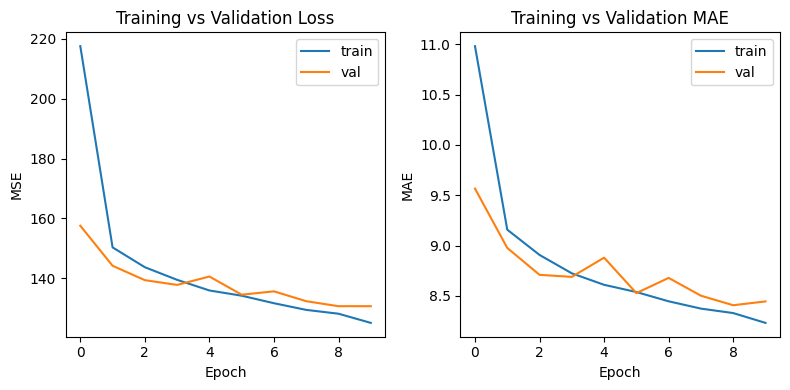

In [ ]:
# Callback untuk pelatihan yang lebih stabil
cb = [
    tf.keras.callbacks.EarlyStopping(
        patience=3,
        restore_best_weights=True,
        monitor='val_loss'
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        patience=2,
        factor=0.5,
        min_lr=1e-5,
        monitor='val_loss'
    )
]
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
    callbacks=cb,
    verbose=1
)

# Visualisasi perubahan loss dan MAE selama pelatihan:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epoch');
plt.ylabel('MSE');
plt.title('Training vs Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='val')
plt.xlabel('Epoch');
plt.ylabel('MAE')
plt.title('Training vs Validation MAE')
plt.legend()
plt.tight_layout()
plt.show()


### Langkah 8

Epoch 1/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 72s 171ms/step - loss: 189.5793 - mae: 10.2116 - val_loss: 136.1855 - val_mae: 8.9209 - learning_rate: 1.0000e-04
Epoch 2/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - loss: 78.0687 - mae: 6.5940 - val_loss: 124.8140 - val_mae: 8.6437 - learning_rate: 1.0000e-04
Epoch 3/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - loss: 52.3255 - mae: 5.4568 - val_loss: 110.5293 - val_mae: 8.0188 - learning_rate: 1.0000e-04
Epoch 4/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 38.4061 - mae: 4.7120 - val_loss: 117.9133 - val_mae: 8.2972 - learning_rate: 1.0000e-04
Epoch 5/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - loss: 30.3945 - mae: 4.2009 - val_loss: 112.7744 - val_mae: 8.0366 - learning_rate: 1.0000e-04


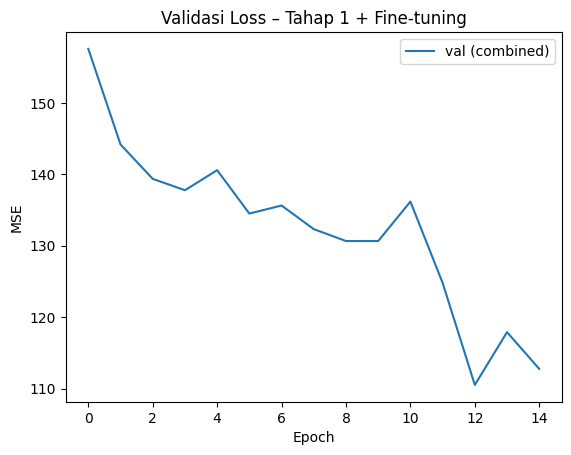

In [ ]:
# Aktifkan kembali sebagian layer terakhir untuk fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-30]:
  layer.trainable = False # beku sebagian besar layer

# Recompile dengan learning rate lebih kecil
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='mse', metrics=['mae'])

history_ft = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=5,
  callbacks=cb,
    verbose=1
)

# Visualisasi gabungan training dan fine-tuning:
plt.plot(history.history['val_loss'] + history_ft.history['val_loss'], label='val (combined)')
plt.title("Validasi Loss – Tahap 1 + Fine-tuning")
plt.xlabel("Epoch");
plt.ylabel("MSE")
plt.legend();
plt.show()


### Langkah 9

MAE = 8.02 tahun
RMSE = 10.51 tahun
R²	= 0.722


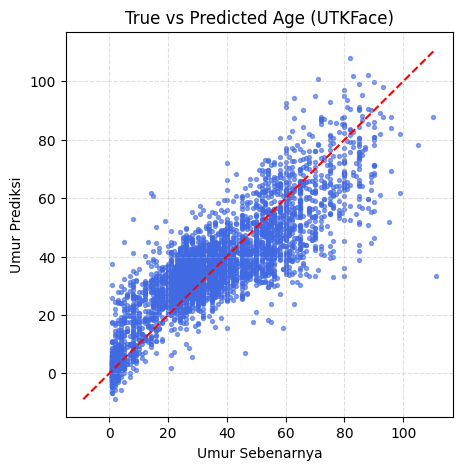

In [ ]:
from math import sqrt

y_pred = np.concatenate([model.predict(batch[0], verbose=0).ravel() for batch in test_ds])
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(np.mean((y_test - y_pred)**2))
r2 = r2_score(y_test, y_pred)

print(f"MAE = {mae:.2f} tahun")
print(f"RMSE = {rmse:.2f} tahun")
print(f"R²	= {r2:.3f}")

# Plot “umur sebenarnya vs umur prediksi”:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, s=8, alpha=0.6, color='royalblue')
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, '--', color='red')
plt.xlabel("Umur Sebenarnya")
plt.ylabel("Umur Prediksi")
plt.title("True vs Predicted Age (UTKFace)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


### Langkah 10

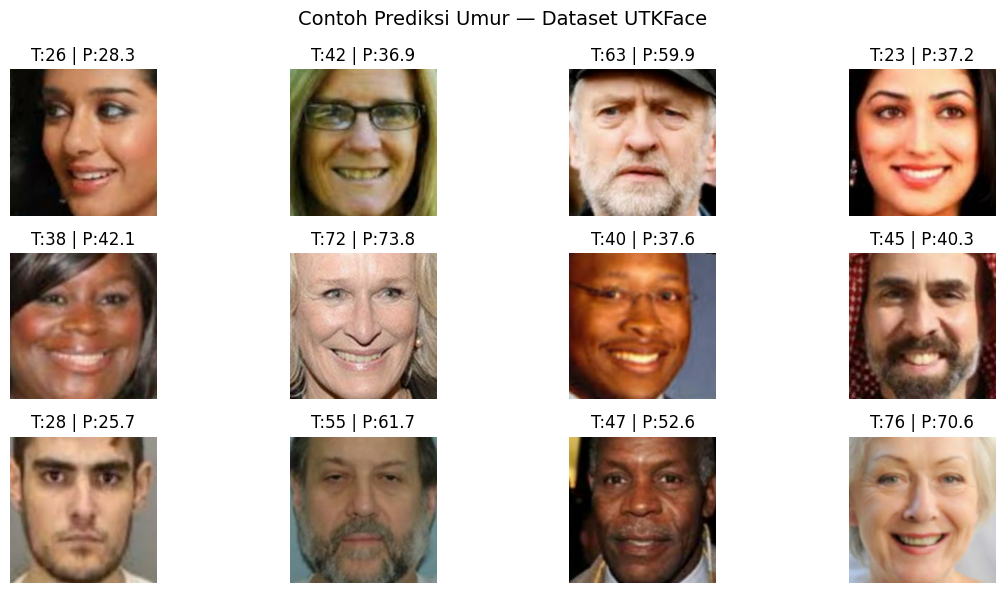

In [ ]:
import random
sample_paths = random.sample(test_files, 12)


plt.figure(figsize=(12,6))
for i, path in enumerate(sample_paths):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))/255.0
  true_age = int(os.path.basename(path).split('_')[0])
  pred_age = model.predict(tf.expand_dims(img, 0), verbose=0).ravel()[0]
  plt.subplot(3,4,i+1)
  plt.imshow(img.numpy())
  plt.title(f"T:{true_age} | P:{pred_age:.1f}")
  plt.axis('off')
plt.suptitle("Contoh Prediksi Umur — Dataset UTKFace", fontsize=14)
plt.tight_layout()
plt.show()


### Tantangan Mini

#### Tambahkan data augmentation ekstra (kontras, brightness, zoom)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Fungsi load gambar sama seperti sebelumnya
def load_img(fp, label):
    img = tf.io.read_file(fp)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    return img / 255.0, label

# Tambahkan augmentasi ekstra
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.2)
])

# Terapkan augmentasi hanya di train dataset
train_ds = tf.data.Dataset.from_tensor_slices((train_files, y_train)) \
    .map(load_img) \
    .map(lambda x, y: (data_augmentation(x, training=True), y)) \
    .batch(64).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((test_files, y_test)) \
    .map(load_img).batch(64).prefetch(tf.data.AUTOTUNE)

print("✅ Dataset dengan augmentasi tambahan siap.")


✅ Dataset dengan augmentasi tambahan siap.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Gunakan GPU jika tersedia
print("Hardware:", "GPU" if tf.config.list_physical_devices('GPU') else "CPU")

# Buat arsitektur model
base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    weights='imagenet'
)
base_model.trainable = False # tahap awal: freeze backbone
# Tambahkan head regresi
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs * 255.0)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(1)(x) # output tunggal: umur
model = tf.keras.Model(inputs, outputs)

# Kompilasi model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss='mse', metrics=['mae'])

model.summary()

Hardware: GPU


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multiply_1 (Multiply)           │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_1 (TrueDivide)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_1 (Subtract)           │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 176s 553ms/step - loss: 490.7280 - mae: 16.8485 - val_loss: 262.4035 - val_mae: 12.4493 - learning_rate: 0.0010
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 145s 487ms/step - loss: 396.2086 - mae: 15.2479 - val_loss: 235.0075 - val_mae: 11.7396 - learning_rate: 0.0010
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 140s 472ms/step - loss: 394.1784 - mae: 15.2307 - val_loss: 239.3152 - val_mae: 12.4120 - learning_rate: 0.0010
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 141s 474ms/step - loss: 393.4138 - mae: 15.1953 - val_loss: 224.5696 - val_mae: 11.7073 - learning_rate: 0.0010
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 169s 568ms/step - loss: 392.2641 - mae: 15.1973 - val_loss: 239.2032 - val_mae: 12.3976 - learning_rate: 0.0010
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 159s 536ms/step - loss: 391.2939 - mae: 15.1721 - val_loss: 214.1362 - val_mae: 11.0495 - learning_rate: 0.0010
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 166s 558ms/step - loss: 391.3953 - mae: 15.1783 

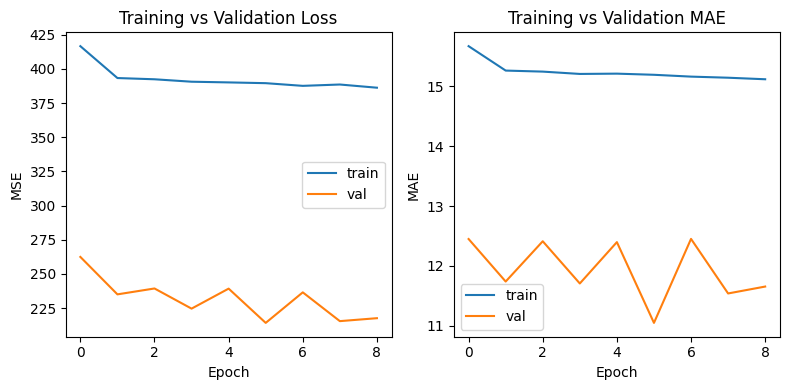

In [ ]:
# Callback untuk pelatihan yang lebih stabil
cb = [
    tf.keras.callbacks.EarlyStopping(
        patience=3,
        restore_best_weights=True,
        monitor='val_loss'
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        patience=2,
        factor=0.5,
        min_lr=1e-5,
        monitor='val_loss'
    )
]
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
    callbacks=cb,
    verbose=1
)

# Visualisasi perubahan loss dan MAE selama pelatihan:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epoch');
plt.ylabel('MSE');
plt.title('Training vs Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='val')
plt.xlabel('Epoch');
plt.ylabel('MAE')
plt.title('Training vs Validation MAE')
plt.legend()
plt.tight_layout()
plt.show()


Epoch 1/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 176s 532ms/step - loss: 423.3864 - mae: 15.7985 - val_loss: 351.5277 - val_mae: 14.3221 - learning_rate: 1.0000e-04
Epoch 2/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 144s 484ms/step - loss: 393.0753 - mae: 15.2485 - val_loss: 545.9646 - val_mae: 19.1834 - learning_rate: 1.0000e-04
Epoch 3/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 146s 490ms/step - loss: 380.6101 - mae: 15.0022 - val_loss: 270.1909 - val_mae: 12.8417 - learning_rate: 1.0000e-04
Epoch 4/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 144s 484ms/step - loss: 374.1129 - mae: 14.8828 - val_loss: 207.6212 - val_mae: 10.8618 - learning_rate: 1.0000e-04
Epoch 5/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 141s 476ms/step - loss: 363.8579 - mae: 14.6550 - val_loss: 179.1318 - val_mae: 10.2175 - learning_rate: 1.0000e-04


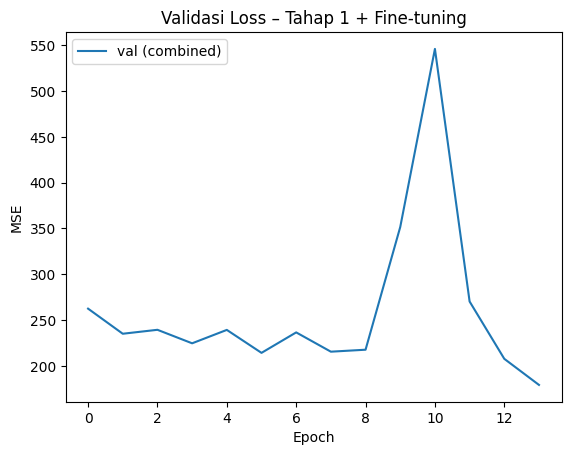

In [ ]:
# Aktifkan kembali sebagian layer terakhir untuk fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-30]:
  layer.trainable = False # beku sebagian besar layer

# Recompile dengan learning rate lebih kecil
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='mse', metrics=['mae'])

history_ft = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=5,
  callbacks=cb,
    verbose=1
)

# Visualisasi gabungan training dan fine-tuning:
plt.plot(history.history['val_loss'] + history_ft.history['val_loss'], label='val (combined)')
plt.title("Validasi Loss – Tahap 1 + Fine-tuning")
plt.xlabel("Epoch");
plt.ylabel("MSE")
plt.legend();
plt.show()


MAE = 10.22 tahun
RMSE = 13.38 tahun
R²	= 0.549


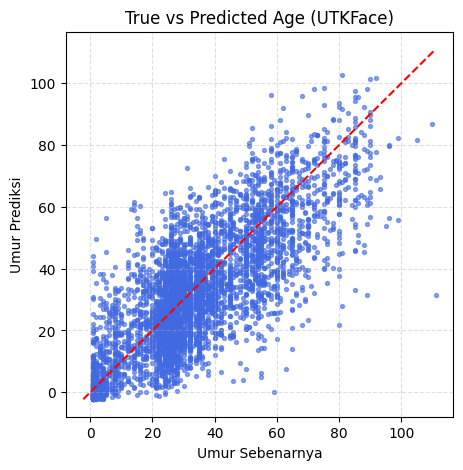

In [ ]:
from math import sqrt

y_pred = np.concatenate([model.predict(batch[0], verbose=0).ravel() for batch in test_ds])
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(np.mean((y_test - y_pred)**2))
r2 = r2_score(y_test, y_pred)

print(f"MAE = {mae:.2f} tahun")
print(f"RMSE = {rmse:.2f} tahun")
print(f"R²	= {r2:.3f}")

# Plot “umur sebenarnya vs umur prediksi”:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, s=8, alpha=0.6, color='royalblue')
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, '--', color='red')
plt.xlabel("Umur Sebenarnya")
plt.ylabel("Umur Prediksi")
plt.title("True vs Predicted Age (UTKFace)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


#### Ubah learning rate schedule atau optimizer

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Gunakan GPU jika tersedia
print("Hardware:", "GPU" if tf.config.list_physical_devices('GPU') else "CPU")

# Buat arsitektur model
base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    weights='imagenet'
)
base_model.trainable = False # tahap awal: freeze backbone
# Tambahkan head regresi
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs * 255.0)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(1)(x) # output tunggal: umur
model = tf.keras.Model(inputs, outputs)

# Kompilasi model
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9
)

opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=opt, loss='mse', metrics=['mae'])

Hardware: GPU


Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 139s 466ms/step - loss: 392.9422 - mae: 15.1968 - val_loss: 244.1924 - val_mae: 12.7564
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 138s 464ms/step - loss: 392.2791 - mae: 15.1855 - val_loss: 216.7866 - val_mae: 11.7207
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 139s 466ms/step - loss: 392.2697 - mae: 15.1615 - val_loss: 211.9322 - val_mae: 11.5610
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 141s 463ms/step - loss: 388.4767 - mae: 15.1109 - val_loss: 199.4185 - val_mae: 11.0107
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 138s 464ms/step - loss: 390.1101 - mae: 15.1549 - val_loss: 241.0773 - val_mae: 12.5866
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 141s 474ms/step - loss: 388.4223 - mae: 15.1191 - val_loss: 210.6990 - val_mae: 11.5262
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 143s 483ms/step - loss: 388.1208 - mae: 15.1084 - val_loss: 209.9419 - val_mae: 11.4855


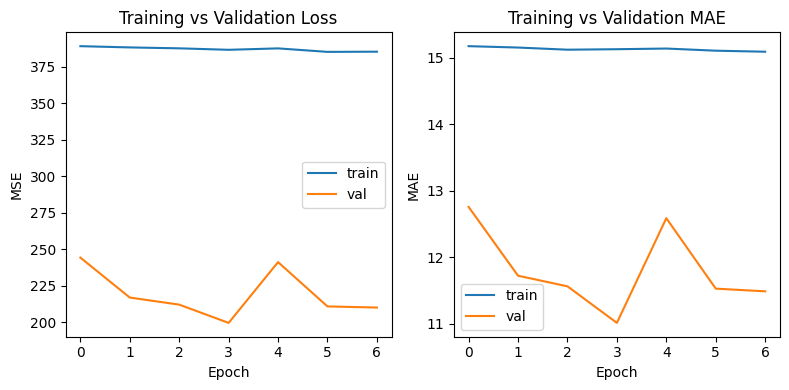

In [ ]:
# Callback untuk pelatihan yang lebih stabil
cb = [
    tf.keras.callbacks.EarlyStopping(
        patience=3,
        restore_best_weights=True,
        monitor='val_loss'
    )
]
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
    callbacks=cb,
    verbose=1
)

# Visualisasi perubahan loss dan MAE selama pelatihan:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epoch');
plt.ylabel('MSE');
plt.title('Training vs Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='val')
plt.xlabel('Epoch');
plt.ylabel('MAE')
plt.title('Training vs Validation MAE')
plt.legend()
plt.tight_layout()
plt.show()


Epoch 1/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 174s 531ms/step - loss: 434.7973 - mae: 15.9868 - val_loss: 268.7607 - val_mae: 12.4838
Epoch 2/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 142s 478ms/step - loss: 393.5220 - mae: 15.2327 - val_loss: 265.9534 - val_mae: 12.5729
Epoch 3/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 142s 478ms/step - loss: 379.0099 - mae: 14.9303 - val_loss: 228.7269 - val_mae: 11.5821
Epoch 4/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 144s 484ms/step - loss: 368.0630 - mae: 14.7982 - val_loss: 228.1217 - val_mae: 11.3814
Epoch 5/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 202s 485ms/step - loss: 371.5840 - mae: 14.8263 - val_loss: 236.3274 - val_mae: 11.7001


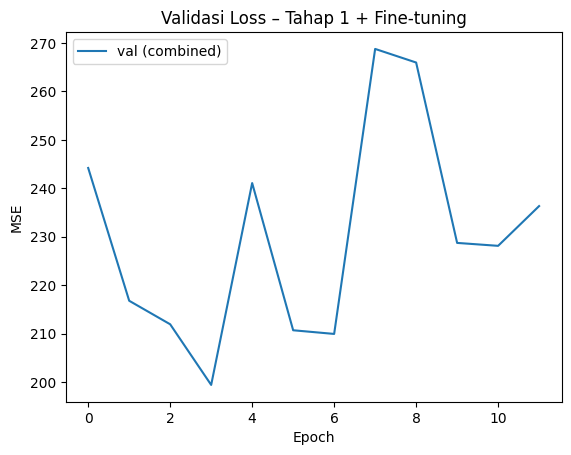

In [ ]:
# Aktifkan kembali sebagian layer terakhir untuk fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-30]:
  layer.trainable = False # beku sebagian besar layer

# Recompile dengan learning rate lebih kecil
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='mse', metrics=['mae'])

history_ft = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=5,
  callbacks=cb,
    verbose=1
)

# Visualisasi gabungan training dan fine-tuning:
plt.plot(history.history['val_loss'] + history_ft.history['val_loss'], label='val (combined)')
plt.title("Validasi Loss – Tahap 1 + Fine-tuning")
plt.xlabel("Epoch");
plt.ylabel("MSE")
plt.legend();
plt.show()


MAE = 11.38 tahun
RMSE = 15.10 tahun
R²	= 0.425


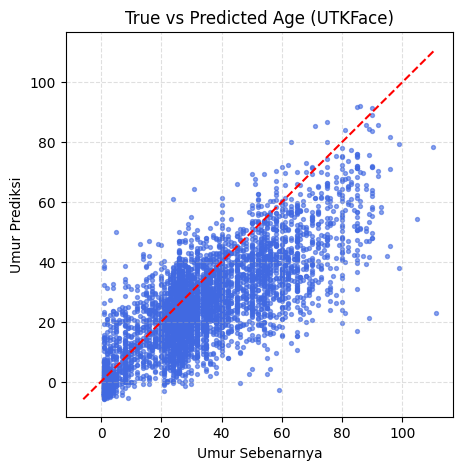

In [ ]:
from math import sqrt

y_pred = np.concatenate([model.predict(batch[0], verbose=0).ravel() for batch in test_ds])
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(np.mean((y_test - y_pred)**2))
r2 = r2_score(y_test, y_pred)

print(f"MAE = {mae:.2f} tahun")
print(f"RMSE = {rmse:.2f} tahun")
print(f"R²	= {r2:.3f}")

# Plot “umur sebenarnya vs umur prediksi”:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, s=8, alpha=0.6, color='royalblue')
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, '--', color='red')
plt.xlabel("Umur Sebenarnya")
plt.ylabel("Umur Prediksi")
plt.title("True vs Predicted Age (UTKFace)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


#### Pisahkan dataset per kelompok umur (0–10, 11–20, dst)

/tmp/ipython-input-2656948342.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mae_per_group = df.groupby('Group').apply(lambda d: np.mean(np.abs(d['TrueAge'] - d['PredAge'])))
/tmp/ipython-input-2656948342.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mae_per_group = df.groupby('Group').apply(lambda d: np.mean(np.abs(d['TrueAge'] - d['PredAge'])))


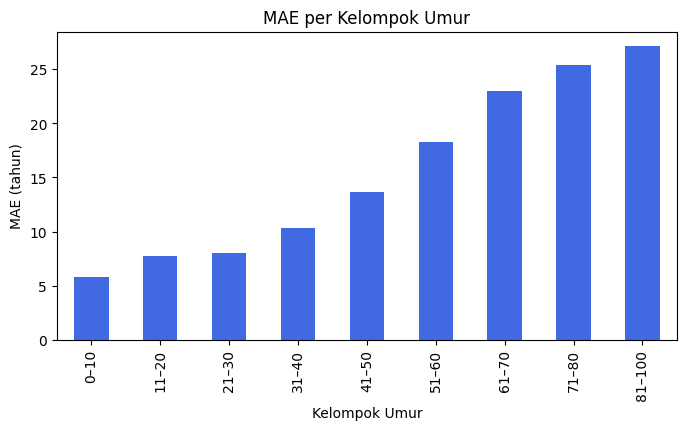

Group
0–10       5.786613
11–20      7.734275
21–30      8.050018
31–40     10.326693
41–50     13.690518
51–60     18.273422
61–70     22.965910
71–80     25.363855
81–100    27.121578
dtype: float32


In [ ]:
import pandas as pd
import numpy as np

bins = [0,10,20,30,40,50,60,70,80,100]
labels = ["0–10","11–20","21–30","31–40","41–50","51–60","61–70","71–80","81–100"]
groups = pd.cut(y_test, bins=bins, labels=labels, right=True)

df = pd.DataFrame({
    'TrueAge': y_test,
    'PredAge': y_pred,
    'Group': groups
})

mae_per_group = df.groupby('Group').apply(lambda d: np.mean(np.abs(d['TrueAge'] - d['PredAge'])))
mae_per_group.plot(kind='bar', color='royalblue', figsize=(8,4))
plt.title("MAE per Kelompok Umur")
plt.ylabel("MAE (tahun)")
plt.xlabel("Kelompok Umur")
plt.show()

print(mae_per_group)


#### Uji model Anda pada wajah sendiri (setelah resize)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cantika.jpg to cantika.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


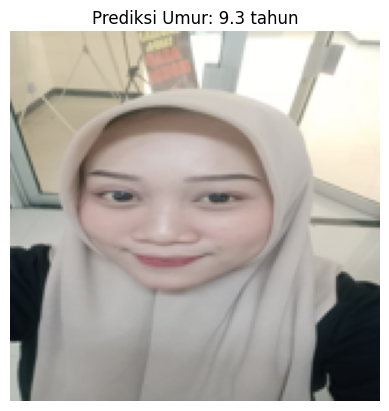

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img_path = list(uploaded.keys())[0]
img = Image.open(img_path).resize((IMG_SIZE, IMG_SIZE))
img_arr = np.array(img)/255.0
img_arr = np.expand_dims(img_arr, 0)

pred_age = model.predict(img_arr)[0][0]

plt.imshow(img)
plt.title(f"Prediksi Umur: {pred_age:.1f} tahun")
plt.axis('off')
plt.show()

## Praktikum D3 — Menilai “Kepopuleran Hewan Peliharaan” dari Foto

### Langkah 1

In [6]:
from google.colab import files
import os, shutil

# Upload file kaggle.json dari komputer
uploaded = files.upload()

# Cek apakah file berhasil diunggah
if "kaggle.json" in uploaded:
    # Buat folder .kaggle jika belum ada
    os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

    # Pindahkan file ke folder .kaggle
    shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))

    # Ubah permission agar aman
    os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)

    # Instal library kaggle
    !pip install -q kaggle
    print("✅ Kaggle API siap digunakan.")
else:
    print("⚠️ kaggle.json belum ditemukan. Upload terlebih dahulu.")


Saving kaggle.json to kaggle.json
✅ Kaggle API siap digunakan.


### Langkah 2

In [7]:
# Unduh dataset Pawpularity (sekitar 800MB)
!kaggle competitions download -c petfinder-pawpularity-score -p /content -q
!unzip -q /content/petfinder-pawpularity-score.zip -d /content/paw
print("✅ Dataset Pawpularity berhasil diekstrak.")

✅ Dataset Pawpularity berhasil diekstrak.


### Langkah 3

                                 Id  Subject Focus  Eyes  Face  Near  Action  \
0  0007de18844b0dbbb5e1f607da0606e0              0     1     1     1       0   
1  0009c66b9439883ba2750fb825e1d7db              0     1     1     0       0   
2  0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1       0   
3  0018df346ac9c1d8413cfcc888ca8246              0     1     1     1       0   
4  001dc955e10590d3ca4673f034feeef2              0     0     0     1       0   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  Pawpularity  \
0          0      1        0      0          0     0     0           63   
1          0      0        0      0          0     0     0           42   
2          0      0        0      1          1     0     0           28   
3          0      0        0      0          0     0     0           15   
4          0      1        0      0          0     0     0           72   

                                                path  
0  /content/p

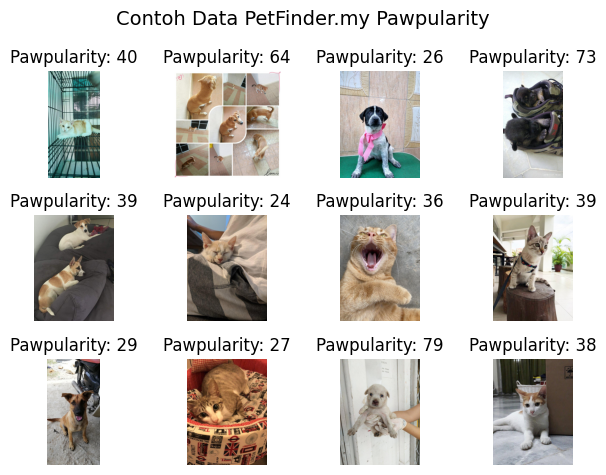

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

# Muat CSV
df = pd.read_csv('/content/paw/train.csv')
df['path'] = df['Id'].apply(lambda x: f"/content/paw/train/{x}.jpg")
print(df.head())

# Tampilkan 12 contoh gambar plt.figure(figsize=(12, 6))
for i, row in enumerate(df.sample(12, random_state=42).itertuples()):
  img = Image.open(row.path)
  plt.subplot(3, 4, i + 1)
  plt.imshow(img)
  plt.title(f"Pawpularity: {row.Pawpularity}")
  plt.axis('off')
plt.suptitle("Contoh Data PetFinder.my Pawpularity", fontsize=14)
plt.tight_layout()
plt.show()



### Langkah 4

In [9]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

IMG_SIZE = 224
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

def load_image(path, label):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
  img = tf.cast(img, tf.float32) / 255.0
  return img, tf.cast(label, tf.float32)

train_ds = tf.data.Dataset.from_tensor_slices((train_df['path'],
train_df['Pawpularity']))\
    .map(load_image, num_parallel_calls=tf.data.AUTOTUNE)\
    .shuffle(4096).batch(64).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((val_df['path'],
val_df['Pawpularity']))\
    .map(load_image, num_parallel_calls=tf.data.AUTOTUNE)\
    .batch(64).prefetch(tf.data.AUTOTUNE)

print(f"Dataset siap digunakan — {len(train_df)} untuk training,{len(val_df)} untuk validasi.")


Dataset siap digunakan — 7929 untuk training,1983 untuk validasi.


### Langkah 4

In [10]:
from tensorflow.keras import layers, models

base = tf.keras.applications.EfficientNetB0(
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    weights='imagenet'
)
base.trainable = False # freeze sementara

inputs = tf.keras.Input((IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.efficientnet.preprocess_input(inputs * 255.0)

x = base(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(1)(x)

model = tf.keras.Model(inputs, outputs)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multiply (Multiply)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,377,764 (16.70 MB)

 Trainable params: 328,193 (1.25 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

### Langkah 5

In [11]:
cb = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5)
]

history = model.fit(train_ds, validation_data=val_ds, epochs=10, callbacks=cb, verbose=1)

Epoch 1/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 110s 500ms/step - loss: 829.6830 - mae: 21.7677 - val_loss: 482.7468 - val_mae: 15.9711 - learning_rate: 0.0010
Epoch 2/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 42s 236ms/step - loss: 424.9226 - mae: 15.1917 - val_loss: 434.7990 - val_mae: 15.3820 - learning_rate: 0.0010
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 37s 203ms/step - loss: 400.3105 - mae: 14.8264 - val_loss: 411.5514 - val_mae: 15.0991 - learning_rate: 0.0010
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 37s 201ms/step - loss: 378.7191 - mae: 14.5416 - val_loss: 398.8938 - val_mae: 14.8537 - learning_rate: 0.0010
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 41s 231ms/step - loss: 353.5161 - mae: 13.9869 - val_loss: 387.5196 - val_mae: 14.5214 - learning_rate: 0.0010
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 37s 198ms/step - loss: 353.1487 - mae: 13.7969 - val_loss: 383.2076 - val_mae: 14.1733 - learning_rate: 0.0010
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 41s 200ms/step - loss: 350.8554 - mae: 13.9336 - val_

### Langkah 6

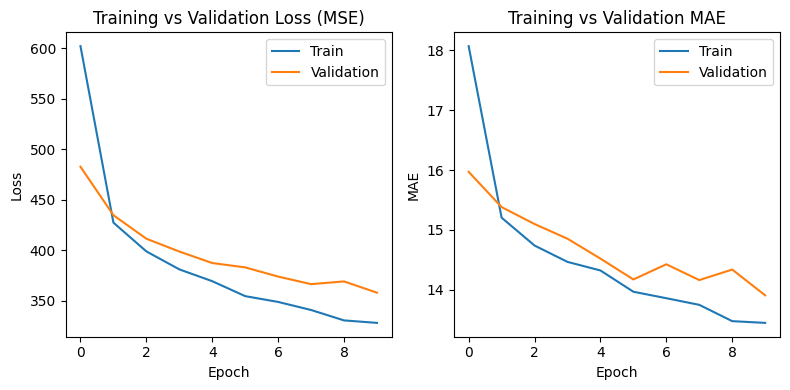

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Training vs Validation Loss (MSE)")
plt.xlabel("Epoch");
plt.ylabel("Loss");
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train')
plt.plot(history.history['val_mae'], label='Validation')
plt.title("Training vs Validation MAE")
plt.xlabel("Epoch");
plt.ylabel("MAE");
plt.legend()
plt.tight_layout()
plt.show()

### Langkah 7

MAE = 13.91
RMSE = 18.93
R²	= 0.190


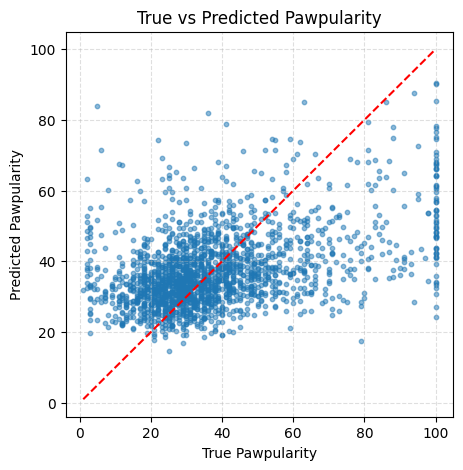

In [13]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from math import sqrt

y_true = val_df['Pawpularity'].values.astype(np.float32)
y_pred = np.concatenate([model.predict(batch[0], verbose=0).ravel() for batch in val_ds])

mae = mean_absolute_error(y_true, y_pred)
rmse = sqrt(np.mean((y_true - y_pred)**2))
r2 = r2_score(y_true, y_pred)

print(f"MAE = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²	= {r2:.3f}")

# Plot hasil prediksi vs nilai sebenarnya:
plt.figure(figsize=(5,5))
plt.scatter(y_true, y_pred, s=10, alpha=0.5)
lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
plt.plot(lims, lims, '--', color='red')
plt.xlabel("True Pawpularity")
plt.ylabel("Predicted Pawpularity")
plt.title("True vs Predicted Pawpularity")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

### Langkah 8

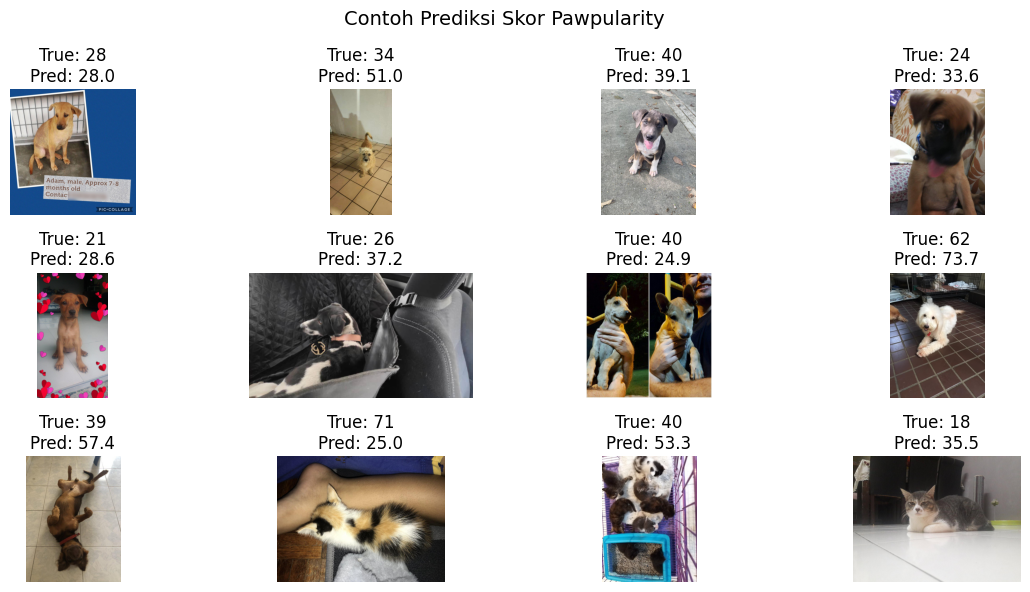

In [14]:
import random
from PIL import Image

sample_rows = val_df.sample(12, random_state=1)

plt.figure(figsize=(12,6))
for i, row in enumerate(sample_rows.itertuples()):
  img = Image.open(row.path)
  pred = model.predict(tf.expand_dims(load_image(row.path, row.Pawpularity)[0], 0), verbose=0).ravel()[0]
  plt.subplot(3,4,i+1)
  plt.imshow(img)
  plt.title(f"True: {row.Pawpularity}\nPred: {pred:.1f}")
  plt.axis('off')
plt.suptitle("Contoh Prediksi Skor Pawpularity", fontsize=14)
plt.tight_layout()
plt.show()

### Tantangan Mini

#### Coba tambahkan data augmentation agar model tidak bosan dengan pola yang sama

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models

IMG_SIZE = 224

# Data augmentation layer
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.2)
])

# Bangun model baru dengan augmentation
base_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    weights='imagenet'
)
base_model.trainable = False

inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.efficientnet.preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(1)(x)  # output regresi
model = tf.keras.Model(inputs, x)

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 61s 282ms/step - loss: 850.9084 - mae: 22.1106 - val_loss: 442.5399 - val_mae: 15.5519
Epoch 2/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 44s 251ms/step - loss: 431.1626 - mae: 15.5835 - val_loss: 443.7894 - val_mae: 16.0714
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 41s 233ms/step - loss: 428.3196 - mae: 15.6485 - val_loss: 442.7291 - val_mae: 15.9387
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 83s 243ms/step - loss: 415.6892 - mae: 15.3584 - val_loss: 443.7125 - val_mae: 16.0662
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 85s 270ms/step - loss: 417.1237 - mae: 15.3631 - val_loss: 442.5565 - val_mae: 15.9175
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 43s 242ms/step - loss: 416.9915 - mae: 15.2555 - val_loss: 442.9362 - val_mae: 15.9743
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 86s 283ms/step - loss: 423.2948 - mae: 15.4970 - val_loss: 442.9355 - val_mae: 15.9735
Epoch 8/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 46s 268ms/step - loss: 408.8282 - mae: 15.1941 - val_loss: 443.4470 - v

31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step - loss: 435.9774 - mae: 15.8755
MAE = 15.96


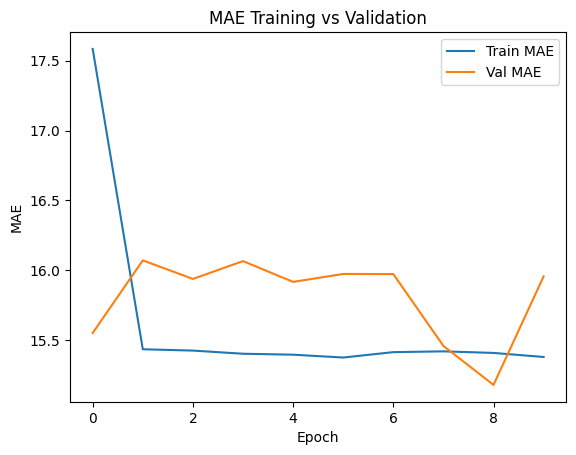

In [16]:
# 📊 Evaluasi Performa Model
loss, mae = model.evaluate(val_ds)
print(f"MAE = {mae:.2f}")

plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title("MAE Training vs Validation")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.show()


#### Gunakan EfficientNetB3 atau ResNet50, lalu bandingkan hasilnya


In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models

IMG_SIZE = 224

# Data augmentation layer
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.2)
])

base_model = tf.keras.applications.EfficientNetB3(
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    weights='imagenet'
)
base_model.trainable = False

inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.efficientnet.preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(1)(x)  # output regresi
model = tf.keras.Model(inputs, x)

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_ds, validation_data=val_ds, epochs=10)

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 86s 405ms/step - loss: 777.4381 - mae: 21.2672 - val_loss: 445.5058 - val_mae: 16.1169
Epoch 2/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 58s 358ms/step - loss: 427.2452 - mae: 15.5132 - val_loss: 442.6209 - val_mae: 15.7174
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 58s 362ms/step - loss: 417.7935 - mae: 15.3008 - val_loss: 443.6038 - val_mae: 16.0421
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 57s 352ms/step - loss: 417.6621 - mae: 15.4144 - val_loss: 442.6154 - val_mae: 15.4903
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 56s 345ms/step - loss: 409.9535 - mae: 15.1815 - val_loss: 446.5831 - val_mae: 16.3590
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 59s 361ms/step - loss: 415.2361 - mae: 15.3318 - val_loss: 442.5685 - val_mae: 15.4326
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 57s 353ms/step - loss: 401.5391 - mae: 14.9628 - val_loss: 440.6706 - val_mae: 15.6348
Epoch 8/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 56s 348ms/step - los

31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 271ms/step - loss: 434.9227 - mae: 15.8095
MAE = 15.88


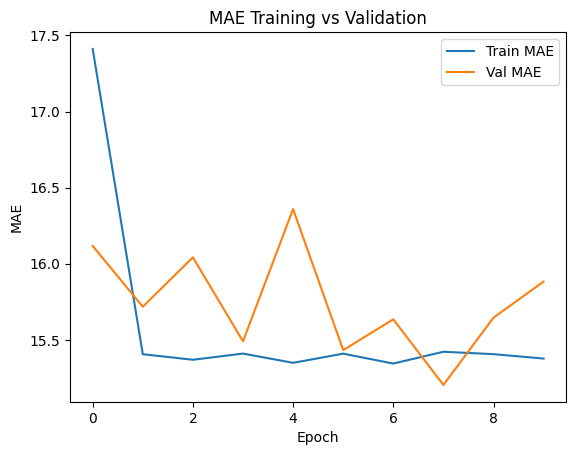

In [18]:
# 📊 Evaluasi Performa Model
loss, mae = model.evaluate(val_ds)
print(f"MAE = {mae:.2f}")

plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title("MAE Training vs Validation")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.show()

#### Buat eksperimen kecil: pisahkan anjing vs kucing — apakah model bias ke salah satu spesies?

Type
Other    9912
Name: count, dtype: int64

Rata-rata skor Pawpularity per jenis hewan:
       Pawpularity  Pred_Pawpularity
Type                                
Other    38.039044         55.529028


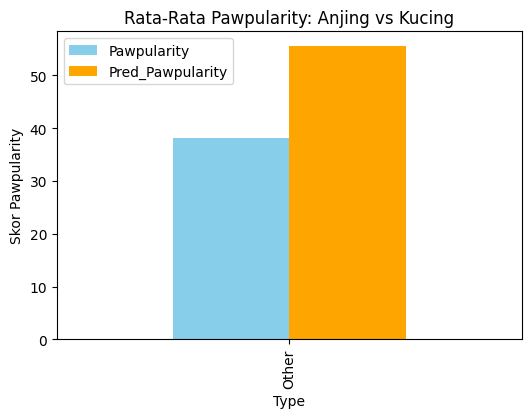

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca data Pawpularity kamu
df = pd.read_csv('/content/paw/train.csv')
df['path'] = df['Id'].apply(lambda x: f"/content/paw/train/{x}.jpg")

# Tambahkan prediksi model (misalnya hasil prediksi kamu sudah ada di y_pred)
# Kalau kamu belum punya variabel y_pred, ini contoh dummy biar bisa dijalankan:
import numpy as np
y_pred = np.random.uniform(10, 100, size=len(df))

df["Pred_Pawpularity"] = y_pred

# Deteksi jenis hewan berdasarkan nama file (jika nama file berisi 'dog' atau 'cat')
df["Type"] = df["path"].apply(
    lambda x: "Dog" if "dog" in x.lower() else ("Cat" if "cat" in x.lower() else "Other")
)

# Cek berapa banyak masing-masing jenis
print(df["Type"].value_counts())

# Hitung rata-rata skor aktual dan prediksi per jenis
grouped = df.groupby("Type")[["Pawpularity", "Pred_Pawpularity"]].mean()
print("\nRata-rata skor Pawpularity per jenis hewan:")
print(grouped)

# Visualisasi hasil
grouped.plot(kind="bar", figsize=(6,4), color=['skyblue', 'orange'])
plt.title("Rata-Rata Pawpularity: Anjing vs Kucing")
plt.ylabel("Skor Pawpularity")
plt.show()


#### Tambahkan fitur non-visual (misal brightness rata-rata) ke model regresi

In [26]:
# 💡Tambahkan Fitur Non-Visual (Brightness)
def load_with_brightness(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0
    brightness = tf.reduce_mean(img)
    return (img, tf.expand_dims(brightness, -1)), label

train_ds_b = tf.data.Dataset.from_tensor_slices((train_df['path'], train_df['Pawpularity']))
train_ds_b = train_ds_b.map(load_with_brightness).batch(32).prefetch(tf.data.AUTOTUNE)

val_ds_b = tf.data.Dataset.from_tensor_slices((val_df['path'], val_df['Pawpularity']))
val_ds_b = val_ds_b.map(load_with_brightness).batch(32).prefetch(tf.data.AUTOTUNE)

# Buat model multimodal
input_img = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
input_feat = tf.keras.Input(shape=(1,))
x = tf.keras.applications.efficientnet.preprocess_input(input_img)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Concatenate()([x, input_feat])
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(1)(x)

model_brightness = tf.keras.Model(inputs=[input_img, input_feat], outputs=output)
model_brightness.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_b = model_brightness.fit(train_ds_b, validation_data=val_ds_b, epochs=5)


Epoch 1/5
248/248 ━━━━━━━━━━━━━━━━━━━━ 143s 374ms/step - loss: 691.3133 - mae: 19.5105 - val_loss: 443.0775 - val_mae: 15.6657
Epoch 2/5
248/248 ━━━━━━━━━━━━━━━━━━━━ 39s 157ms/step - loss: 430.3076 - mae: 15.5913 - val_loss: 442.4576 - val_mae: 15.5528
Epoch 3/5
248/248 ━━━━━━━━━━━━━━━━━━━━ 39s 158ms/step - loss: 426.4018 - mae: 15.5022 - val_loss: 442.0126 - val_mae: 15.5273
Epoch 4/5
248/248 ━━━━━━━━━━━━━━━━━━━━ 42s 162ms/step - loss: 426.0551 - mae: 15.5322 - val_loss: 441.6175 - val_mae: 15.5350
Epoch 5/5
248/248 ━━━━━━━━━━━━━━━━━━━━ 39s 153ms/step - loss: 426.0438 - mae: 15.5279 - val_loss: 441.2882 - val_mae: 15.5217


# PENUGASAN

## Ujicoba Prediksi Usia

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cantika2.jpg to cantika2.jpg


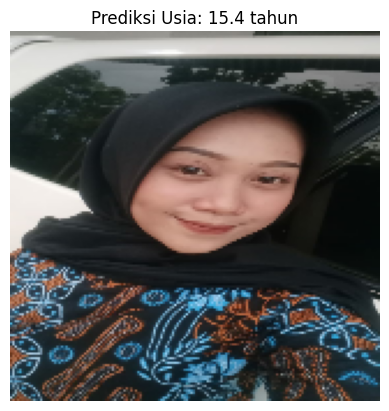

Prediksi usia untuk foto pribadi: 15.41 tahun


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

# Ganti dengan nama file fotomu
img_path = "/content/cantika2.jpg"

# Baca dan ubah ukuran foto
img = tf.io.read_file(img_path)
img = tf.image.decode_jpeg(img, channels=3)
img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0

# Prediksi umur
pred_age = model.predict(tf.expand_dims(img, 0), verbose=0).ravel()[0]

# Tampilkan hasil
plt.imshow(img.numpy())
plt.title(f"Prediksi Usia: {pred_age:.1f} tahun")
plt.axis("off")
plt.show()

print(f"Prediksi usia untuk foto pribadi: {pred_age:.2f} tahun")

## Uji Model Pawpularity

In [27]:
from google.colab import files
uploaded = files.upload()

Saving hewan1.jpg to hewan1.jpg


In [28]:
from tensorflow.keras import layers, models

IMG_SIZE = 224

paw_model = models.Sequential([
    layers.Input((IMG_SIZE, IMG_SIZE, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # output regresi (skor Pawpularity)
])

paw_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

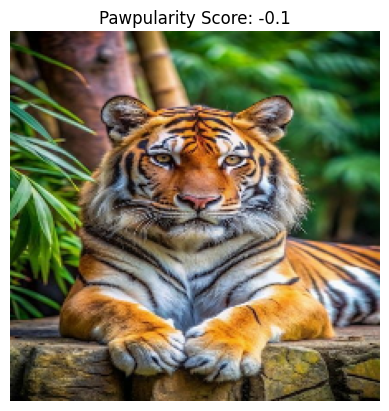

Prediksi Pawpularity untuk foto hewan: -0.08


In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Ganti dengan nama file hewanmu
img_path = "/content/hewan1.jpg"

# Baca dan ubah ukuran sesuai model Pawpularity
IMG_SIZE = 224  # sesuaikan dengan yang kamu pakai waktu training
img = tf.io.read_file(img_path)
img = tf.image.decode_jpeg(img, channels=3)
img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0

# Prediksi skor Pawpularity
pred_score = paw_model.predict(tf.expand_dims(img, 0), verbose=0).ravel()[0]

# Tampilkan hasil
plt.imshow(img.numpy())
plt.title(f"Pawpularity Score: {pred_score:.1f}")
plt.axis("off")
plt.show()

print(f"Prediksi Pawpularity untuk foto hewan: {pred_score:.2f}")